In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

In [2]:
data = fetch_california_housing()
X, y = data.data, data.target
X, y

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)))

In [4]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
df_train = pd.DataFrame(data=X_train)
df_train.columns = data.feature_names
df_train['MedHouseVal'] = y_train
df_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,3.876892,28.575374,5.438125,1.098033,1427.927326,3.119236,35.650669,-119.584102,2.069240
std,1.904908,12.613634,2.453569,0.447498,1140.225190,12.373636,2.135742,2.002930,1.157492
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.567225,18.000000,4.448928,1.006783,791.000000,2.430380,33.940000,-121.800000,1.193000
50%,3.539100,29.000000,5.232422,1.049492,1168.000000,2.817147,34.270000,-118.510000,1.793000
75%,4.758075,37.000000,6.060692,1.100328,1727.000000,3.279135,37.720000,-118.010000,2.646000
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Considering the 25th to 75th percentile rage, most of the median house prices fall within $119,300 and $264,600.

Text(0, 0.5, 'Frequency')

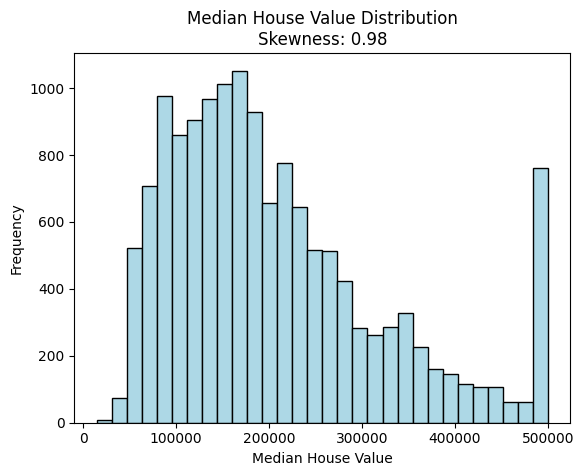

In [7]:
# Distribution of median house prices
plt.hist(1e5 * y_train, bins=30, color='lightblue', ec='k')
plt.title(f"Median House Value Distribution\nSkewness: {skew(y_train):.2f}")
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

Evidently the distribution is skewed and there are quite a few clipped values at $500,000.

In [9]:
# Random Forest Regressor Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_test = rf_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3324
Mean Squared Error (MSE): 0.2566
Root Mean Squared Error (RMSE): 0.5066
R² Score: 0.8045


<details><summary>Description of Metrics</summary>

- Mean Absolute Error = $33,240 => Predicted median house prices are off by $33k.
- Mean Squared Error is less intuitive to interpret, but is being minimized by the model fit.
- Root Mean Squared Error = $50,660
- R-squared Score = 0.80 => Model explains about 80% of the variance in median house prices.
</details>

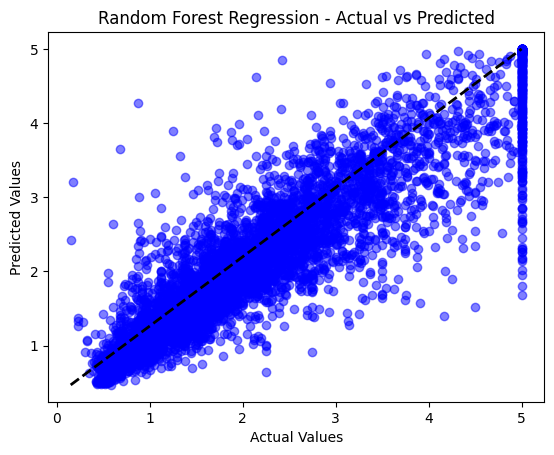

In [10]:
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_pred_test.min(), y_pred_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Random Forest Regression - Actual vs Predicted")
plt.show()

Average Error = -1406
Standard Deviation of Error = 50640


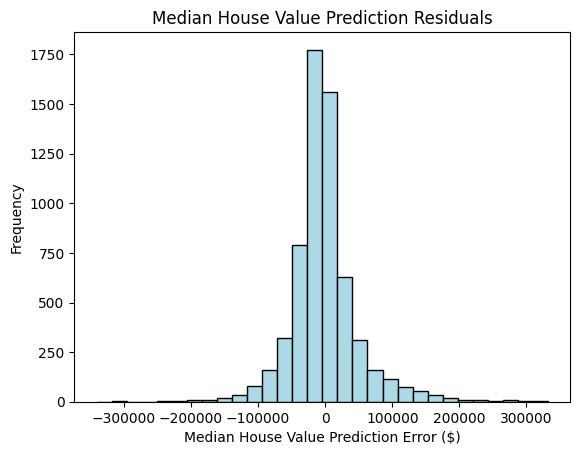

In [13]:
residuals = 1e5 * (y_test - y_pred_test)

plt.hist(residuals, bins=30, color='lightblue', ec='k')
plt.title('Median House Value Prediction Residuals')
plt.xlabel('Median House Value Prediction Error ($)')
plt.ylabel('Frequency')
print(f'Average Error = {str(int(np.mean(residuals)))}')
print(f'Standard Deviation of Error = {str(int(np.std(residuals)))}')

The residuals are normally distributed with a very small average error and a standard deviation of about $50,000.

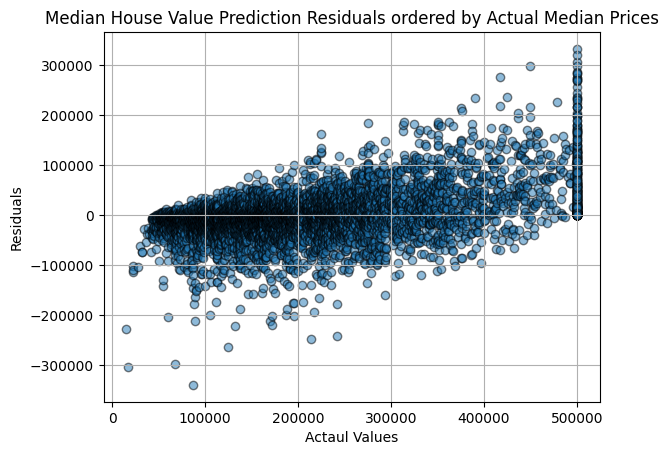

In [14]:
residuals_df = pd.DataFrame({
    'Actual': 1e5 * y_test,
    'Residuals': residuals
})

residuals_df = residuals_df.sort_values(by='Actual')

plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], marker='o', alpha=0.5, ec='k')
plt.title('Median House Value Prediction Residuals ordered by Actual Median Prices')
plt.xlabel('Actaul Values') 
plt.ylabel('Residuals')
plt.grid(True)
plt.show() 

Lower median prices tend to be overpredicted while higher median prices tend to be underpredicted.

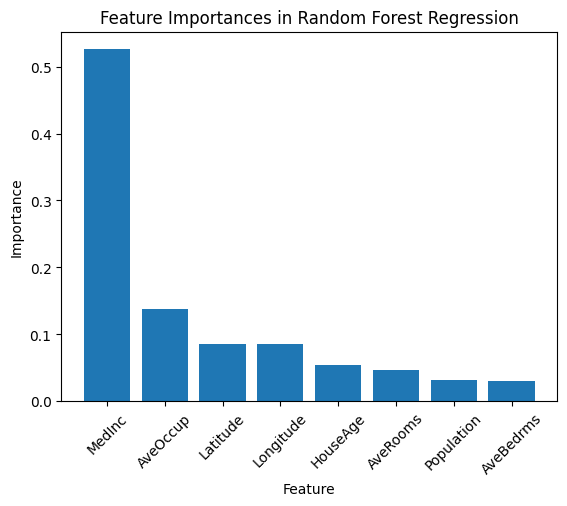

In [16]:
# Feature Importance
f_imp = rf_reg.feature_importances_
indices = np.argsort(f_imp)[::-1]
features = data.feature_names

plt.bar(range(X.shape[1]), f_imp[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Regression')
plt.show()

- Median incomes and house prices are highly correlated.
- Location must be a significant factor, since, it is implied by latitude and longitude that share equal importance. This is because combining them might outweigh average occupancy.